Based on your project's objectives and guidelines, here’s a comprehensive plan addressing your question about deep learning and classical ML for predicting job satisfaction:

1. **Baseline Classical ML Model**: Start by implementing a baseline classical machine learning model. This will help establish a foundational performance level, making it easier to assess the improvements (if any) achieved by the deep learning approach. Techniques such as Random Forests, SVMs, or Gradient Boosting can serve as effective baselines.

2. **Multi-Label and Multi-Category Columns**: With your dataset containing multi-label columns, you’ll need specific preprocessing:
   - **Label Encoding**: Consider label encoding for each multi-category variable. Using embeddings in the deep learning model could also be beneficial for high-cardinality categorical features.
   - **One-Hot Encoding**: This works well for classical ML models but can inflate feature space if there are many categories.
   - **Embedding Layers in Deep Learning**: For deep learning models, embedding layers are recommended for multi-category features, especially when categories have relationships or orders.

3. **Deep Learning Model**: Given your project’s scope, building a deep learning model can be advantageous:
   - **Architecture**: Use a feedforward neural network initially, with embedding layers for multi-category columns. Test deeper architectures or even explore Transformer models if you have sufficient computational resources.
   - **Multi-Label Support**: Deep learning can handle multi-label outputs effectively, especially with architectures designed for such purposes.
   - **TF-IDF Features**: If text-based features are included, you can incorporate TF-IDF or even pre-trained embeddings.

4. **Evaluation and Comparison**: Use consistent metrics and protocols for both models. Since the project requires a concise presentation, focus on:
   - **Comparison with Evaluation Protocol**: Metrics such as accuracy, F1-score, or AUC-ROC will give insights into model performance.
   - **Interpretation**: Showcase how each model interprets and weighs the features affecting job satisfaction. SHAP or LIME can help interpret deep learning models.

5. **Presentation and Submission**: Your presentation should emphasize the steps, challenges (especially with multi-label encoding), and the performance comparison between classical and deep learning models. Include insights about whether the additional complexity of deep learning yielded significantly better results.

Let’s start a structured approach to set up your project, covering essential steps from data exploration and preprocessing to model implementation and evaluation. Here’s how we can proceed:

### Step 1: Data Exploration and Cleaning
   - **Load and Inspect the Data**: Begin by examining the structure, checking data types, and getting an initial summary (e.g., `info()`, `describe()` in Python).
   - **Check for Missing Values**: Identify any columns with missing values and decide how to handle them. Since you’re avoiding imputation for `JobSat`, removing NaNs for this column is preferable, but for other columns, consider imputation based on relevance (e.g., mean, median for numerical, mode for categorical).
   - **Identify Outliers**: Use visualization (e.g., box plots) or statistical methods (like IQR) to identify potential outliers, particularly in numerical features that may skew results.
   - **Basic Data Cleaning**: Clean up any erroneous or inconsistent entries (like unexpected strings or symbols in numerical columns). Ensure consistent formatting across columns.

### Step 2: Data Preprocessing
   - **Data Leakage Prevention**: Carefully separate training and test data to avoid any data leakage, particularly if using temporal data. Refrain from any transformation (e.g., scaling, encoding) that might introduce target information into feature space before splitting.
   - **Feature Scaling**: Scale numerical features using StandardScaler or MinMaxScaler to improve deep learning model convergence. Scaling should be applied after splitting data to prevent data leakage.
   - **Encoding Categorical and Multi-Label Features**:
      - **One-Hot Encoding**: For categorical features in classical ML models, use one-hot encoding.
      - **Label Encoding / Embedding Layers**: For multi-label features, use embedding layers in deep learning models or label encoding for simpler ML methods.
   - **TF-IDF for Text Features**: Convert any text-based features using TF-IDF and combine them with the original dataset if they add predictive value.

### Step 3: Feature Engineering
   - **Correlation Analysis**: Perform correlation analysis with `JobSat` to assess which features have the most influence. Feature importance from classical models can guide feature selection.
   - **Interaction Terms**: Create interaction terms between key features if you hypothesize they may impact job satisfaction (e.g., combining technology preferences and work satisfaction).

### Step 4: Baseline Classical ML Models
   - **Model Selection**: Start with simple classical models like Random Forests or Gradient Boosting as baselines.
   - **Hyperparameter Tuning**: Use simple random search over a range of hyperparameters. This step can be repeated for the deep learning models to assess improvement.
   - **Cross-Validation**: Perform cross-validation on the training set to check for consistency and validate the model’s generalizability.

### Step 5: Deep Learning Model Development
   - **Model Architecture**:
      - **Feedforward Network**: Design a basic feedforward neural network as a starting point. Experiment with additional layers and neurons based on results.
      - **Embedding Layers**: Implement embedding layers for multi-label or high-cardinality categorical features to capture relational patterns.
   - **Regularization**: To prevent overfitting, use dropout layers, batch normalization, or L2 regularization as needed.
   - **Loss Function and Evaluation Metrics**: Choose a suitable loss function (like binary cross-entropy for multi-label classification) and metrics (e.g., accuracy, F1-score, AUC) to evaluate your model.
   - **Optimization**: Use an optimizer like Adam and experiment with learning rate schedules to improve convergence.

### Step 6: Evaluation and Comparison
   - **Test Set Evaluation**: Evaluate both classical ML and deep learning models on the test set. Track metrics like accuracy, precision, recall, and F1-score to compare performance.
   - **Interpret Results**: Use model explainability tools like SHAP for feature importance, especially for deep learning models, to help understand the factors impacting job satisfaction.

### Step 7: Presentation Preparation
   - Summarize the problem, objectives, preprocessing steps, model approaches, and results.
   - Highlight the comparison between the baseline classical ML and deep learning models, emphasizing performance differences.
   - Present interpretability insights and discuss limitations or future improvements.


In [1]:
# import pandas as pd

# # Load the data files to understand their structure
# schema_path = 'survey_results_schema.csv'
# public_data_path = 'survey_results_public.csv'

# # Load both schema and survey data to inspect
# schema_df = pd.read_csv(schema_path)
# public_data_df = pd.read_csv(public_data_path)

# # Display the first few rows of each to analyze their structure and identify the target variable
# schema_df.head(), public_data_df.head()


In [2]:
# # Define train_features and train_labels
# # We'll use `dropna` here to focus on rows with valid `JobSat` entries

# # Dropping rows where JobSat is NaN as they cannot be used for supervised learning
# data = public_data_df.dropna(subset=['JobSat'])
# train_features = data.drop(columns=['JobSat', 'ResponseId'])  # Dropping target and non-feature identifier
# train_labels = data['JobSat']  # Target variable

# # Verifying the shapes and a quick look at the data
# train_features.shape, train_labels.shape, train_features.head(), train_labels.head()


In [3]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# # Step 1: Identify numeric and categorical columns for preprocessing
# numeric_features = train_features.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = train_features.select_dtypes(include=['object']).columns

# # Step 2: Define preprocessing steps for numeric and categorical data
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# # Step 3: Define the model pipeline
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('regressor', RandomForestRegressor(random_state=42))])

# # Step 4: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, 
#                                                     test_size=0.2, random_state=42)

# # Step 5: Train the model
# pipeline.fit(X_train, y_train)

# # Step 6: Make predictions and evaluate the model
# y_pred = pipeline.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# mse, r2


In [4]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Step 1: Retrieve feature names after preprocessing (for both numeric and encoded categorical features)
# # This includes handling the OneHotEncoder output
# encoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1] \
#     .named_steps['onehot'].get_feature_names_out(categorical_features)

# # Concatenate numeric and encoded feature names for final feature list
# feature_names = np.concatenate([numeric_features, encoded_feature_names])

# # Step 2: Get feature importances from the trained model
# feature_importances = pipeline.named_steps['regressor'].feature_importances_

# # Create a DataFrame for easy analysis and sorting
# feature_importance_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': feature_importances
# }).sort_values(by='importance', ascending=False)

# # Step 3: Display top 20 features by importance
# top_features = feature_importance_df.head(20)

# # Plot the top 20 features
# plt.figure(figsize=(10, 8))
# plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
# plt.xlabel('Feature Importance')
# plt.title('Top 20 Most Important Features')
# plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
# plt.show()

# # Display the top features DataFrame to understand their impact in detail
# top_features


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# np.random.seed(42)



In [6]:
import pandas as pd

# Load the dataset
data_path = 'survey_results_public.csv'
data = pd.read_csv(data_path)

# Display the first few rows and basic info to understand the structure and data types
data_head = data.head()
data_info = data.info()

# Standardize column names by removing spaces and special characters
data.columns = data.columns.str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '', regex=True)

# Display the updated column names for verification
updated_columns = data.columns.tolist()
data_head, updated_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


(   ResponseId                      MainBranch                 Age  \
 0           1  I am a developer by profession  Under 18 years old   
 1           2  I am a developer by profession     35-44 years old   
 2           3  I am a developer by profession     45-54 years old   
 3           4           I am learning to code     18-24 years old   
 4           5  I am a developer by profession     18-24 years old   
 
             Employment RemoteWork   Check  \
 0  Employed, full-time     Remote  Apples   
 1  Employed, full-time     Remote  Apples   
 2  Employed, full-time     Remote  Apples   
 3   Student, full-time        NaN  Apples   
 4   Student, full-time        NaN  Apples   
 
                                     CodingActivities  \
 0                                              Hobby   
 1  Hobby;Contribute to open-source projects;Other...   
 2  Hobby;Contribute to open-source projects;Other...   
 3                                                NaN   
 4             

In [7]:
# Function to detect multilabel columns
def find_multilabel_columns(df):
    multilabel_columns = []
    for column in df.columns:
        # Check if any cell in the column has multiple labels (separated by commas, for example)
        if df[column].apply(lambda x: isinstance(x, str) and ',' in x).any():
            multilabel_columns.append(column)
    return multilabel_columns

# Get list of multilabel columns
multilabel_columns = find_multilabel_columns(data)
print("Multilabel columns:", multilabel_columns)

Multilabel columns: ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'DevType', 'OrgSize', 'Country', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'SOComm', 'AISelect', 'AIComplex', 'AIChallenges', 'ProfessionalQuestion', 'Industry']


In [118]:
# Check for missing values across all columns
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values and their counts
missing_columns


AINextMuch_less_integrated    64289
AINextLess_integrated         63082
AINextNo_change               52939
AINextMuch_more_integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define target column (assuming JobSat is the target based on project description)
target_column = 'JobSat'
# Remove rows where the target column 'JobSat' is NaN to prevent issues with stratification
data = data.dropna(subset=[target_column])

# Re-run the train-test split after handling NaN values in the target column
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target_column])

# Separate features and target columns again for imputation
train_features = train_data.drop(columns=[target_column])
train_target = train_data[target_column]
test_features = test_data.drop(columns=[target_column])
test_target = test_data[target_column]

# Reapply imputation for missing values based on training data
for col in train_features.columns:
    if train_features[col].dtype == 'object':
        mode_value = train_features[col].mode()[0]
        train_features[col] = train_features[col].fillna(mode_value)
        test_features[col] = test_features[col].fillna(mode_value)
    else:
        median_value = train_features[col].median()
        train_features[col] = train_features[col].fillna(median_value)
        test_features[col] = test_features[col].fillna(median_value)

# Recombine features with target for both train and test sets
train_data = pd.concat([train_features, train_target], axis=1)
test_data = pd.concat([test_features, test_target], axis=1)

# Confirm no missing values remain in the modified dataset
train_missing_values = train_data.isnull().sum().sum()
test_missing_values = test_data.isnull().sum().sum()

train_missing_values, test_missing_values


(0, 0)

In [120]:
train_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
16835,16836,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,...,80.0,50.0,20.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,66000.0,5.0
40638,40639,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,...,9.0,9.0,9.0,9.0,9.0,9.0,Appropriate in length,Easy,66000.0,7.0
39715,39716,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,...,40.0,50.0,10.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,110000.0,7.0
39649,39650,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,50.0,0.0,50.0,0.0,0.0,0.0,Appropriate in length,Easy,73312.0,9.0
44832,44833,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,15.0,20.0,20.0,0.0,0.0,Appropriate in length,Easy,66000.0,8.0


In [121]:
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import pandas as pd
# import numpy as np

# # Define target column
# target_column = 'JobSat'
# data = data.dropna(subset=[target_column])  # Drop rows with NaN in the target column

# # Train-test split
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target_column])

# # Separate features and target
# train_features = train_data.drop(columns=[target_column])
# train_target = train_data[target_column]
# test_features = test_data.drop(columns=[target_column])
# test_target = test_data[target_column]

# # Identify numeric and categorical columns
# numeric_features = train_features.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = train_features.select_dtypes(include=['object']).columns

# # Define the imputation transformers
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median'))  # Impute with median for numerical columns
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute with mode for categorical columns
# ])

# # Apply transformers to the columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ]
# )

# # Fit and transform on training data, then transform on test data
# train_features = preprocessor.fit_transform(train_features)
# test_features = preprocessor.transform(test_features)

# # Convert transformed features back to DataFrame to enable missing value checks
# # We'll use the same column names for clarity
# train_data = pd.DataFrame(train_features, columns=numeric_features.tolist() + list(preprocessor.named_transformers_['cat'].named_steps['imputer'].get_feature_names_out(categorical_features)))
# test_data = pd.DataFrame(test_features, columns=numeric_features.tolist() + list(preprocessor.named_transformers_['cat'].named_steps['imputer'].get_feature_names_out(categorical_features)))

# # Check for any remaining missing values
# train_missing = train_data.isnull().sum().sum()
# test_missing = test_data.isnull().sum().sum()

# print("Missing values in training set after imputation:", train_missing)
# print("Missing values in test set after imputation:", test_missing)


In [122]:
# train_data.head()

In [123]:
train_data.shape

(23300, 114)

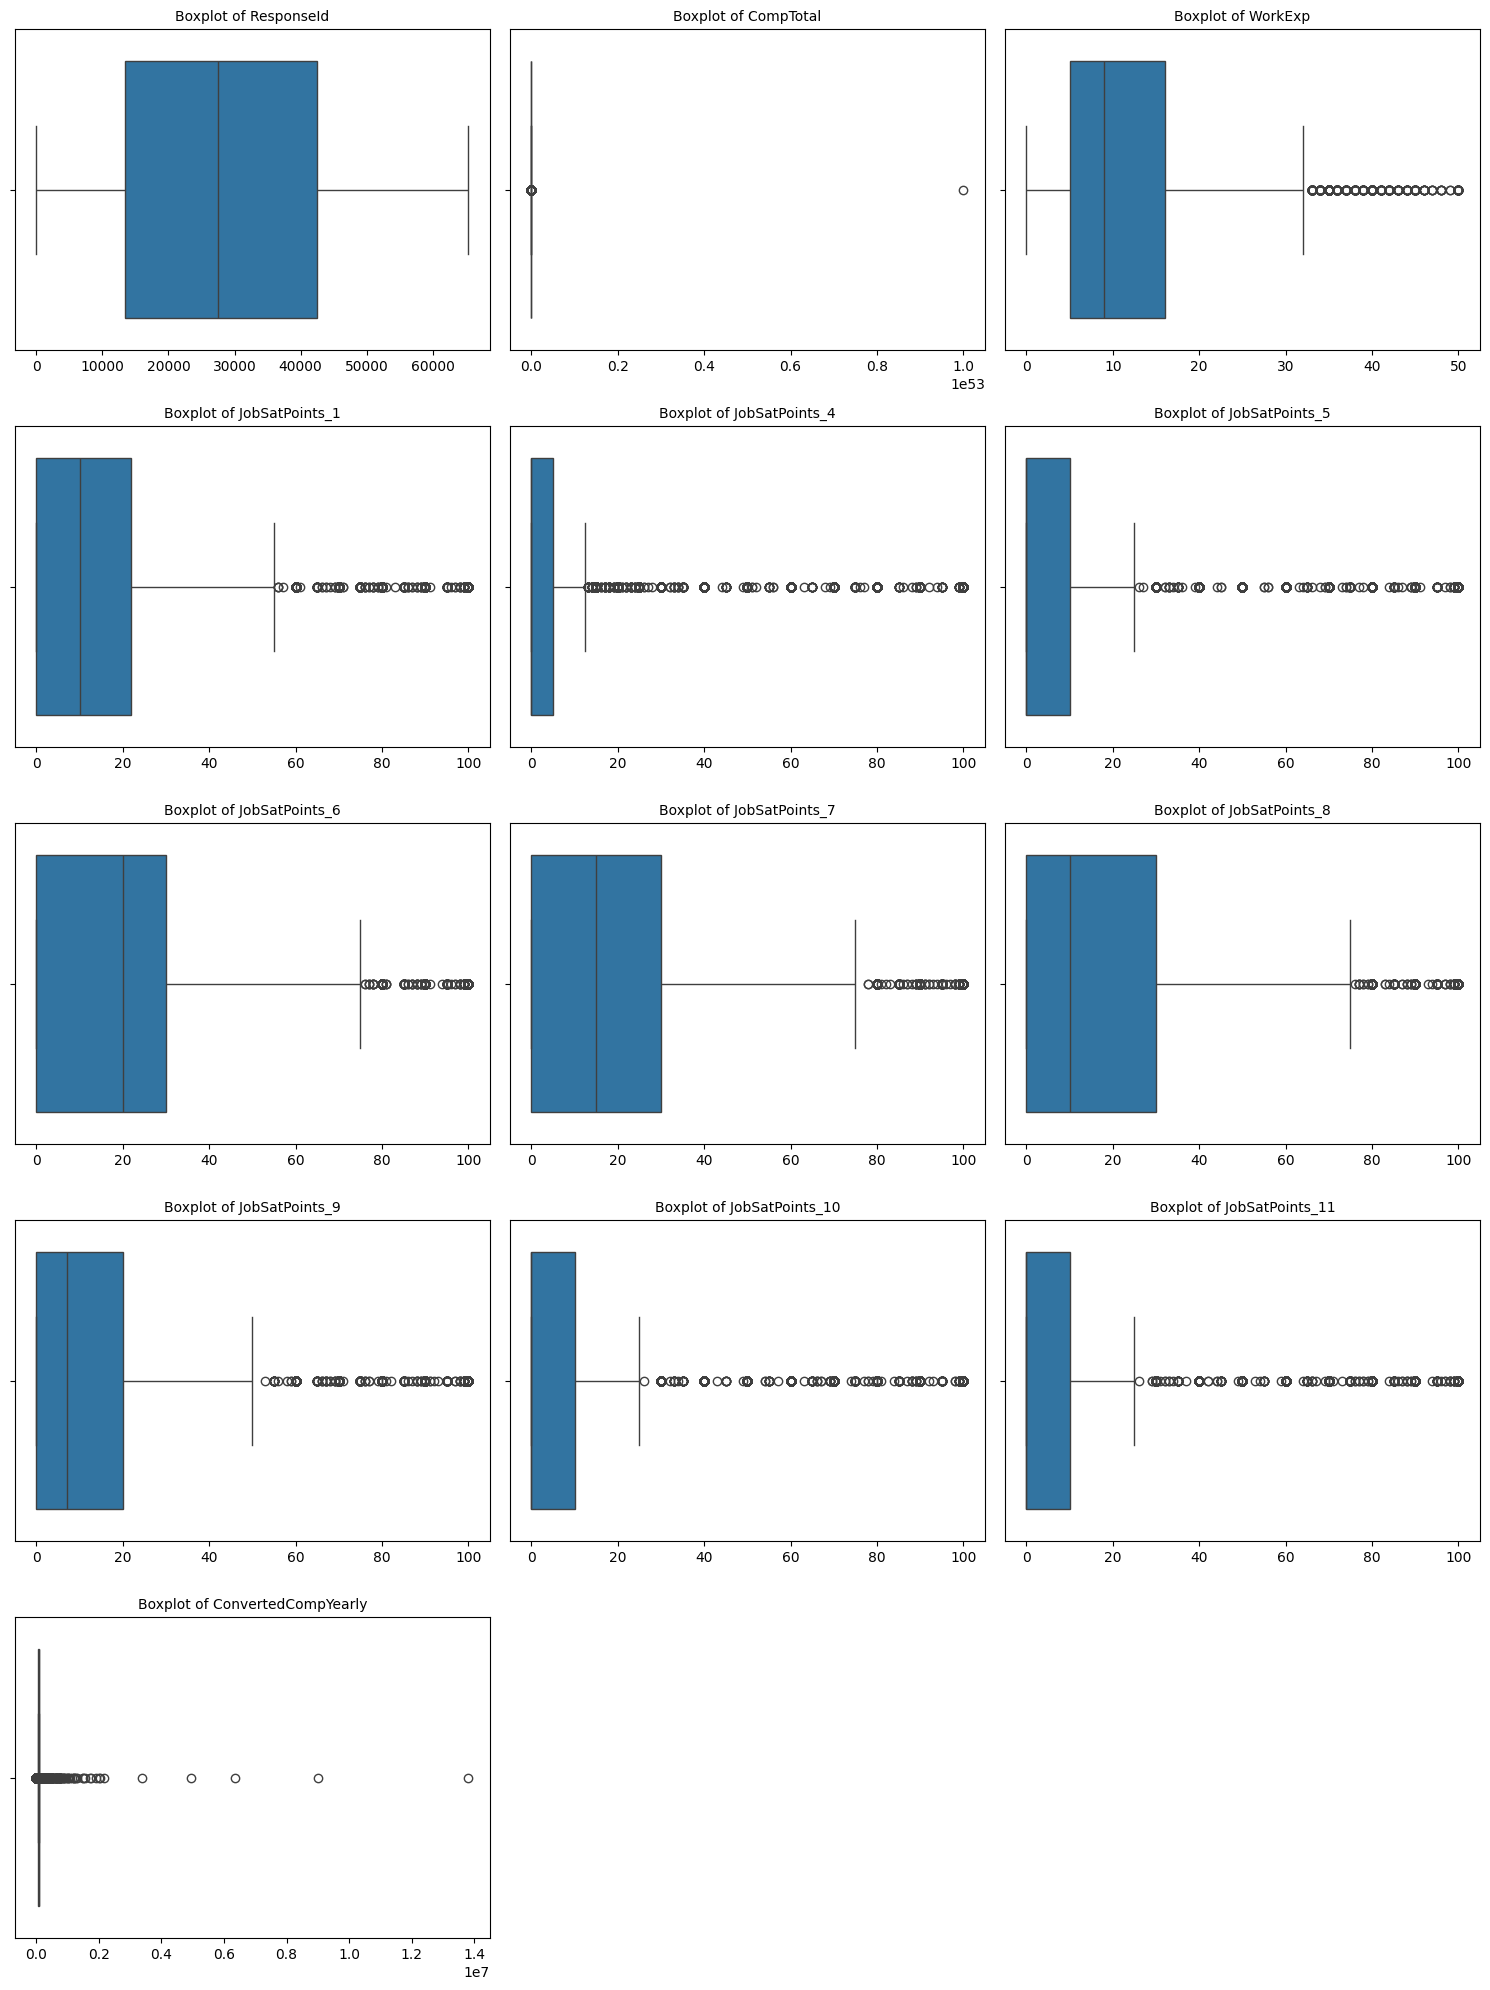

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical columns for outlier detection
numerical_columns = train_features.select_dtypes(include=['float64', 'int64']).columns

# Number of columns to display per row
columns_per_row = 3
# Calculate the number of rows needed
num_rows = math.ceil(len(numerical_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.boxplot(x=train_features[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


In [125]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Identify numerical columns for outlier detection
# numerical_columns = train_features.select_dtypes(include=['float64', 'int64']).columns

# # Plot boxplots for numerical columns in the training set to visualize potential outliers
# plt.figure(figsize=(15, 2 * len(numerical_columns)))
# for i, col in enumerate(numerical_columns, 1):
#     plt.subplot(len(numerical_columns), 1, i)
#     sns.boxplot(x=train_features[col])
#     plt.title(f'Boxplot of {col}')
# plt.tight_layout()
# plt.show()


In [126]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# # Select columns with significant outliers identified in the boxplots
# outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]

# # Set up grid layout: 3 columns per row
# columns_per_row = 3
# num_rows = math.ceil(len(outlier_columns) / columns_per_row)

# plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
# for i, col in enumerate(outlier_columns, 1):
#     plt.subplot(num_rows, columns_per_row, i)
#     sns.histplot(train_features[col].dropna(), kde=True, bins=30)
#     plt.title(f'Distribution of {col} (Original)')
#     plt.xlabel('')  # Hide x-axis label for cleaner look

# plt.tight_layout()
# plt.show()


In [127]:
# # Visualize the original distributions for numerical columns with noticeable outliers
# import numpy as np

# # Select columns with significant outliers identified in the boxplots
# outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]

# # Plot histograms of original distributions for these columns
# plt.figure(figsize=(15, 2 * len(outlier_columns)))
# for i, col in enumerate(outlier_columns, 1):
#     plt.subplot(len(outlier_columns), 1, i)
#     sns.histplot(train_features[col].dropna(), kde=True, bins=30)
#     plt.title(f'Distribution of {col} (Original)')
# plt.tight_layout()
# plt.show()


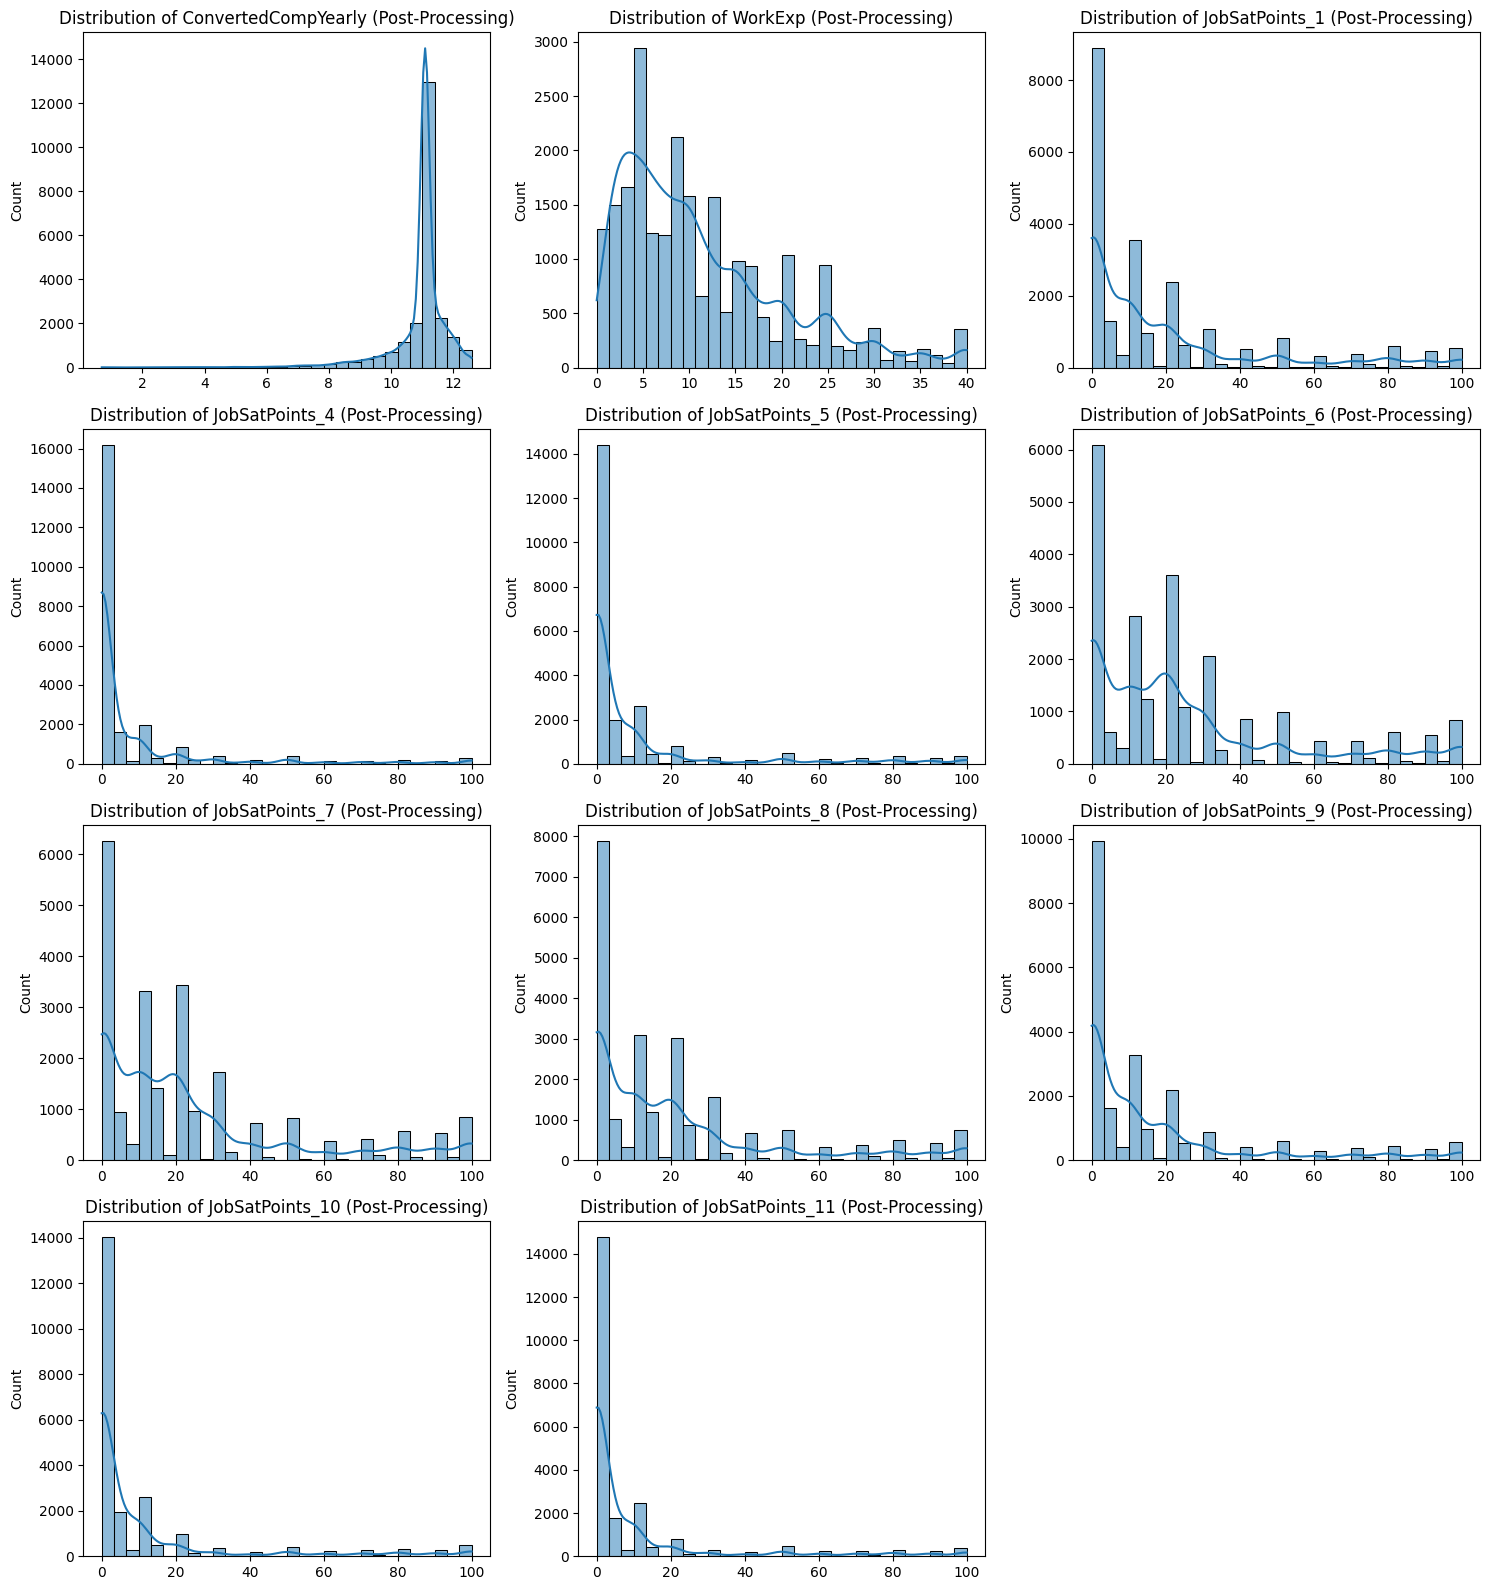

In [128]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Check for negative values in 'ConvertedCompYearly' before applying log transformation
if (train_features['ConvertedCompYearly'] < 0).any() or (test_features['ConvertedCompYearly'] < 0).any():
    raise ValueError("Negative values found in 'ConvertedCompYearly', which cannot be log-transformed directly.")

# Apply log transformation to 'ConvertedCompYearly' to reduce skewness
train_features['ConvertedCompYearly'] = np.log1p(train_features['ConvertedCompYearly'])
test_features['ConvertedCompYearly'] = np.log1p(test_features['ConvertedCompYearly'])

# Define columns with potential outliers and set the 99th percentile cap using training data
outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]
cap_values = {col: train_features[col].quantile(0.99) for col in outlier_columns}

# Apply the cap values to both training and test sets for consistency
for col in outlier_columns:
    cap_value = cap_values[col]
    train_features[col] = np.where(train_features[col] > cap_value, cap_value, train_features[col])
    test_features[col] = np.where(test_features[col] > cap_value, cap_value, test_features[col])

# Visualize the adjusted distributions to confirm outlier handling
columns_per_row = 3
num_rows = math.ceil(len(outlier_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.histplot(train_features[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Post-Processing)')
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


In [129]:
# # Import numpy for the log transformation
# import numpy as np

# # Apply log transformation to 'ConvertedCompYearly' to reduce skewness
# train_features['ConvertedCompYearly'] = np.log1p(train_features['ConvertedCompYearly'])
# test_features['ConvertedCompYearly'] = np.log1p(test_features['ConvertedCompYearly'])

# # Define the 99th percentile cap for 'WorkExp' and 'JobSatPoints_*' columns in the training data
# for col in ['WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]:
#     cap_value = train_features[col].quantile(0.99)
#     train_features[col] = np.where(train_features[col] > cap_value, cap_value, train_features[col])
#     test_features[col] = np.where(test_features[col] > cap_value, cap_value, test_features[col])

# # Visualize the adjusted distributions to confirm outlier handling
# plt.figure(figsize=(15, 2 * len(outlier_columns)))
# for i, col in enumerate(outlier_columns, 1):
#     plt.subplot(len(outlier_columns), 1, i)
#     sns.histplot(train_features[col].dropna(), kde=True, bins=30)
#     plt.title(f'Distribution of {col} (Post-Processing)')
# plt.tight_layout()
# plt.show()


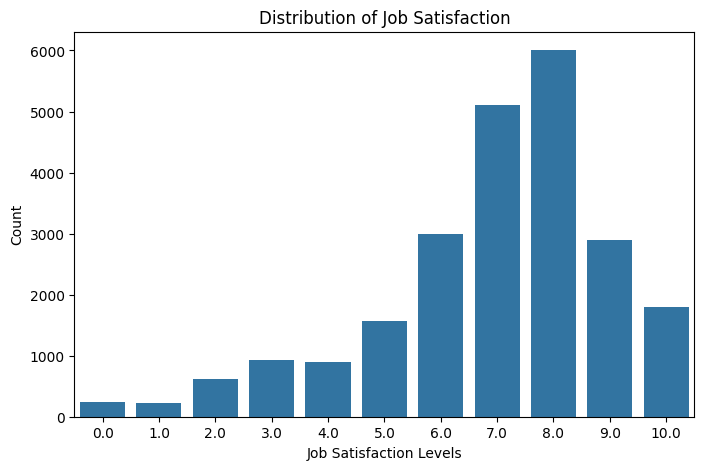

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable `JobSat` to understand class balance
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['JobSat'])
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Levels")
plt.ylabel("Count")
plt.show()


In [131]:
# Define a mapping function for job satisfaction levels to new classes
def map_job_satisfaction(value):
    if value >= 0 and value <= 4:
        return 0  # Low Satisfaction
    elif value >= 5 and value <= 7:
        return 1  # Moderate Satisfaction
    elif value >= 8 and value <= 10:
        return 2  # High Satisfaction

# Apply the mapping to transform `JobSat` into the new classes
train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# Confirm the new class distribution
print("New Class Distribution in Training Set:")
print(train_data['JobSat_Class'].value_counts())
print("\nNew Class Distribution in Test Set:")
print(test_data['JobSat_Class'].value_counts())

# Update target variable for model training
y_train = train_data['JobSat_Class']
y_test = test_data['JobSat_Class']

# Drop original JobSat column to avoid confusion
train_data = train_data.drop(columns=['JobSat'])
test_data = test_data.drop(columns=['JobSat'])


New Class Distribution in Training Set:
JobSat_Class
2    10709
1     9668
0     2923
Name: count, dtype: int64

New Class Distribution in Test Set:
JobSat_Class
2    2677
1    2418
0     731
Name: count, dtype: int64


In [132]:
train_data.shape

(23300, 114)

In [133]:
# Check for missing values across all columns in the training and test datasets after processing
missing_values_train = train_features.isnull().sum()
missing_values_test = test_features.isnull().sum()

# Display columns with missing values in the training and test datasets
missing_values_train = missing_values_train[missing_values_train > 0]
missing_values_test = missing_values_test[missing_values_test > 0]

missing_values_train, missing_values_test


(Series([], dtype: int64), Series([], dtype: int64))

In [134]:
import pandas as pd

# Assuming train_data and test_data are already defined as per the user's code

# Combine train and test data into a single DataFrame with an indicator for train/test split
train_data['Dataset'] = 'train'
test_data['Dataset'] = 'test'

# Concatenate both dataframes
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Save to a single CSV file
combined_data.to_csv("combined_train_test.csv", index=False)



In [135]:
# # Function to dynamically identify and preprocess multi-label columns based on a delimiter
# def dynamic_preprocess_multi_label_columns(df, delimiter=';'):
#     """
#     This function identifies columns with multiple labels in each cell (using the given delimiter)
#     and performs multi-hot encoding for each unique category in those columns.
    
#     Parameters:
#     - df: The DataFrame containing possible multi-label columns.
#     - delimiter: The delimiter used to separate labels in the multi-label columns.
    
#     Returns:
#     - The DataFrame with multi-hot encoded columns for each unique label.
#     """
#     # Loop through columns to identify and process multi-label columns
#     for col in df.columns:
#         # Check if the column contains multi-labels by detecting the delimiter in any cell
#         if df[col].apply(lambda x: isinstance(x, str) and delimiter in x).any():
#             # Multi-hot encode the column
#             multi_label_dummies = df[col].str.get_dummies(sep=delimiter)
#             # Rename columns to include the original column name as prefix
#             multi_label_dummies = multi_label_dummies.add_prefix(f"{col}_")
#             # Concatenate the dummies with the original DataFrame
#             df = pd.concat([df, multi_label_dummies], axis=1)
#             # Drop the original multi-label column
#             df = df.drop(columns=[col])
#     return df

# # Apply the function to preprocess dynamically identified multi-label columns in both train and test sets
# train_features = dynamic_preprocess_multi_label_columns(train_features)
# test_features = dynamic_preprocess_multi_label_columns(test_features)

# # Display the resulting columns to confirm the multi-label columns were processed
# train_features.head()


In [136]:
# from sklearn.preprocessing import StandardScaler

# # Identify numerical columns for normalization
# numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the training data, then transform the test data
# train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
# test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# # Verify normalization results
# train_features.head()


In [137]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for normalization
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Verify normalization results by checking the first few rows of the transformed data
print(train_data[numerical_columns].head())
print(test_data[numerical_columns].head())


       ResponseId  CompTotal   WorkExp  JobSatPoints_1  JobSatPoints_4  \
16835   -0.670274  -0.006551 -0.162030        2.363619        3.346667   
40638    0.707344  -0.006551 -0.708524       -0.337094       -0.088671   
39715    0.653925  -0.006551  0.165867       -0.722910       -0.410734   
39649    0.650105  -0.006551 -0.162030       -0.722910       -0.410734   
44832    0.950075  -0.006551 -0.380628       -0.337094        0.662809   

       JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  JobSatPoints_8  \
16835       -0.463324        2.042237        0.991104       -0.021210   
40638       -0.098033       -0.578696       -0.527402       -0.441800   
39715       -0.463324        0.565655        0.991104       -0.403565   
39649       -0.463324        0.934800       -0.860732        1.125852   
44832       -0.463324       -0.357209       -0.305181       -0.021210   

       JobSatPoints_9  JobSatPoints_10  JobSatPoints_11  ConvertedCompYearly  \
16835       -0.657132        -0.4808

In [138]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [139]:
import keras
print("Keras version:", keras.__version__)


Keras version: 3.6.0


In [140]:
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder
# import numpy as np

# # Identify multi-label columns dynamically based on the delimiter (e.g., ';')
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]

# # Print identified multi-label columns
# print("Identified multi-label columns:", multi_label_columns)

# # Dictionary to hold tokenized data for each multi-label column
# tokenized_data = {}
# max_lengths = {}
# num_categories = {}

# # Process each multi-label column safely
# for col in multi_label_columns:
#     # Split labels by delimiter and flatten
#     tokenized = train_data[col].fillna('').str.split(';').tolist()
    
#     # Encode each unique category as an integer ID without any implied ordinality
#     le = LabelEncoder()
#     flat_labels = [item for sublist in tokenized for item in sublist if item]  # Flatten list and remove empty strings
#     le.fit(flat_labels)
    
#     # Update number of unique categories for this column (embedding input dimension)
#     num_categories[col] = len(le.classes_)
    
#     # Convert each instance to a list of integer IDs for embedding lookup
#     tokenized_data[col] = [le.transform([label for label in labels if label]) for labels in tokenized]
    
#     # Determine max length (padding) for this column
#     max_lengths[col] = max(len(labels) for labels in tokenized_data[col])

# # Pad sequences for each multi-label column
# for col in multi_label_columns:
#     tokenized_data[col] = pad_sequences(tokenized_data[col], maxlen=max_lengths[col], padding='post')

# # Building the embedding model with these safely encoded multi-label columns
# embedding_layers = []
# input_layers = []

# for col in multi_label_columns:
#     # Define input layer for this multi-label column
#     input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#     input_layers.append(input_layer)
    
#     # Define embedding layer with unique IDs
#     embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=16, input_length=max_lengths[col])(input_layer)
#     flattened_embedding = Flatten()(embedding_layer)
#     embedding_layers.append(flattened_embedding)

# # Additional input layer for other features
# num_other_features = train_data.drop(columns=multi_label_columns).shape[1]
# other_features_input = Input(shape=(num_other_features,), name="other_features_input")
# input_layers.append(other_features_input)

# # Concatenate all embeddings and other features
# concatenated = Concatenate()(embedding_layers + [other_features_input])

# # Add dense layers and output for multi-class classification
# # x = Dense(64, activation='relu')(concatenated)
# # x = Dense(32, activation='relu')(x)
# from tensorflow.keras.layers import LeakyReLU

# # x = Dense(64)(concatenated)
# # x = LeakyReLU(alpha=0.01)(x)
# # output = Dense(3, activation='softmax')(x)  # 3 classes


# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.regularizers import l2

# # Add Dropout and L2 regularization to the dense layer
# x = Dense(64, activation=None, kernel_regularizer=l2(0.001))(concatenated)
# x = LeakyReLU()(x)
# x = Dropout(0.5)(x)  # Dropout with 50% rate

# output = Dense(3, activation='softmax')(x)



# # Build and compile the model
# model = Model(inputs=input_layers, outputs=output)
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy', 'Precision', 'Recall'])

# # Summary of the model to verify the setup
# model.summary()


In [141]:
train_data.JobSat_Class

16835   -0.485674
40638   -0.485674
39715   -0.485674
39649    0.967730
44832    0.967730
           ...   
44573    0.967730
13426    0.967730
28068    0.967730
18492   -0.485674
23875   -1.939077
Name: JobSat_Class, Length: 23300, dtype: float64

In [142]:
print("Available columns in train_data:", train_data.columns.tolist())


Available columns in train_data: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 

In [143]:
# multi_label_columns = [col.strip() for col in multi_label_columns]


In [144]:
# print("Multi-label columns identified:", multi_label_columns)


In [145]:
train_data.columns = train_data.columns.str.strip()


In [146]:
# print("Shape after concatenation:", concatenated.shape)


In [147]:
# from kerastuner import HyperModel, RandomSearch
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# import numpy as np
# import pandas as pd

# # Step 1: Identify multi-label columns dynamically
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
# print("Identified multi-label columns:", multi_label_columns)

# # Initialize dictionaries to store information for each multi-label column
# tokenized_data = {}
# max_lengths = {}
# num_categories = {}

# # Step 2: Process each multi-label column
# for col in multi_label_columns:
#     tokenized = train_data[col].fillna('').str.split(';')
#     flat_labels = [item for sublist in tokenized for item in sublist if item]
#     le = LabelEncoder()
#     le.fit(flat_labels)
    
#     num_categories[col] = len(le.classes_)
#     tokenized_data[col] = tokenized.apply(lambda x: le.transform([label for label in x if label]) if x else []).tolist()
#     max_lengths[col] = max(len(labels) for labels in tokenized_data[col])
#     print(f"Column '{col}': max length = {max_lengths[col]}, num categories = {num_categories[col]}")

# # Step 3: Pad sequences for each multi-label column
# for col in multi_label_columns:
#     tokenized_data[col] = pad_sequences(tokenized_data[col], maxlen=max_lengths[col], padding='post').astype(np.float32)
#     print(f"After padding, shape of '{col}' data:", tokenized_data[col].shape)

# # Step 4: Split data
# X = train_data.drop(columns=['JobSat_Class'])
# y = train_data['JobSat_Class']

# # Encode labels for classification
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# print("Encoded labels shape:", y_encoded.shape)

# # Split into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# print("Training set shape:", X_train.shape)
# print("Validation set shape:", X_val.shape)

# # Step 5: Prepare multi-label inputs
# train_multi_label_inputs = [tokenized_data[col][:len(y_train)] for col in multi_label_columns]
# val_multi_label_inputs = [tokenized_data[col][len(y_train):] for col in multi_label_columns]
# for i, col in enumerate(multi_label_columns):
#     print(f"Shape of '{col}' train input:", train_multi_label_inputs[i].shape)
#     print(f"Shape of '{col}' val input:", val_multi_label_inputs[i].shape)

# # Step 6: Handle other features - categorical and numeric
# other_features_train = X_train.drop(columns=multi_label_columns)
# other_features_val = X_val.drop(columns=multi_label_columns)

# # Identify categorical columns
# categorical_columns = other_features_train.select_dtypes(include=['object']).columns
# print("Categorical columns:", categorical_columns)

# # Encode categorical features using LabelEncoder for simplicity
# for col in categorical_columns:
#     le = LabelEncoder()
#     other_features_train[col] = le.fit_transform(other_features_train[col].astype(str))
    
#     # Use transform with fallback for unknown labels
#     other_features_val[col] = other_features_val[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# # Standardize numeric features
# scaler = StandardScaler()
# other_features_train = scaler.fit_transform(other_features_train)
# other_features_val = scaler.transform(other_features_val)
# print("Shape of other_features_train:", other_features_train.shape)
# print("Shape of other_features_val:", other_features_val.shape)

# # Combine all inputs for model
# train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
# val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]
# print("Total train inputs:", len(train_inputs))
# print("Total val inputs:", len(val_inputs))

# # Define the number of other features
# num_other_features = other_features_train.shape[1]
# print("Number of other features:", num_other_features)

# # Define HyperModel for Keras Tuner
# class MyHyperModel(HyperModel):
#     def build(self, hp):
#         embedding_layers = []
#         input_layers = []

#         # Create embedding layers for multi-label columns
#         for col in multi_label_columns:
#             input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#             input_layers.append(input_layer)
#             embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=32, step=8)
#             embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
#             flattened_embedding = Flatten()(embedding_layer)
#             embedding_layers.append(flattened_embedding)

#         # Input layer for other features
#         other_features_input = Input(shape=(num_other_features,), name="other_features_input")
#         input_layers.append(other_features_input)
#         embedding_layers.append(other_features_input)

#         # Concatenate all inputs
#         concatenated = Concatenate()(embedding_layers)

#         # Define dense layers with dropout
#         x = Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32))(concatenated)
#         x = LeakyReLU()(x)
#         x = Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.6, step=0.1))(x)
#         x = Dense(hp.Int('dense_units_2', min_value=32, max_value=128, step=32))(x)
#         x = LeakyReLU()(x)
#         output = Dense(len(label_encoder.classes_), activation='softmax')(x)

#         model = Model(inputs=input_layers, outputs=output)
#         model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
#                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         return model

# # Initialize RandomSearch tuner
# tuner = RandomSearch(MyHyperModel(),
#                      objective='val_accuracy',
#                      max_trials=10,
#                      executions_per_trial=2,
#                      directory='my_tuner_dir',
#                      project_name='tune_dropout_and_other_params')

# # Run the tuner
# print("Starting the hyperparameter tuning...")
# tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=5)
# print("Hyperparameter tuning complete.")


In [148]:
# from kerastuner import HyperModel, RandomSearch
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.regularizers import l2  # Added for L2 regularization
# from tensorflow.keras.callbacks import EarlyStopping  # Early stopping
# import numpy as np
# import pandas as pd

# # Step 1: Identify multi-label columns dynamically
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
# print("Identified multi-label columns:", multi_label_columns)

# # Initialize dictionaries to store information for each multi-label column
# tokenized_data = {}
# max_lengths = {}
# num_categories = {}

# # Step 2: Process each multi-label column
# for col in multi_label_columns:
#     tokenized = train_data[col].fillna('').str.split(';')
#     flat_labels = [item for sublist in tokenized for item in sublist if item]
#     le = LabelEncoder()
#     le.fit(flat_labels)
    
#     num_categories[col] = len(le.classes_)
#     tokenized_data[col] = tokenized.apply(lambda x: le.transform([label for label in x if label]) if x else []).tolist()
#     max_lengths[col] = max(len(labels) for labels in tokenized_data[col])
#     print(f"Column '{col}': max length = {max_lengths[col]}, num categories = {num_categories[col]}")

# # Step 3: Pad sequences for each multi-label column
# for col in multi_label_columns:
#     tokenized_data[col] = pad_sequences(tokenized_data[col], maxlen=max_lengths[col], padding='post').astype(np.float32)
#     print(f"After padding, shape of '{col}' data:", tokenized_data[col].shape)

# # Step 4: Split data
# X = train_data.drop(columns=['JobSat_Class'])
# y = train_data['JobSat_Class']

# # Encode labels for classification
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# print("Encoded labels shape:", y_encoded.shape)

# # Split into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# print("Training set shape:", X_train.shape)
# print("Validation set shape:", X_val.shape)

# # Step 5: Prepare multi-label inputs
# train_multi_label_inputs = [tokenized_data[col][:len(y_train)] for col in multi_label_columns]
# val_multi_label_inputs = [tokenized_data[col][len(y_train):] for col in multi_label_columns]
# for i, col in enumerate(multi_label_columns):
#     print(f"Shape of '{col}' train input:", train_multi_label_inputs[i].shape)
#     print(f"Shape of '{col}' val input:", val_multi_label_inputs[i].shape)

# # Step 6: Handle other features - categorical and numeric
# other_features_train = X_train.drop(columns=multi_label_columns)
# other_features_val = X_val.drop(columns=multi_label_columns)

# # Identify categorical columns
# categorical_columns = other_features_train.select_dtypes(include=['object']).columns
# print("Categorical columns:", categorical_columns)

# # Encode categorical features using LabelEncoder for simplicity
# for col in categorical_columns:
#     le = LabelEncoder()
#     other_features_train[col] = le.fit_transform(other_features_train[col].astype(str))
#     other_features_val[col] = other_features_val[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# # Standardize numeric features
# scaler = StandardScaler()
# other_features_train = scaler.fit_transform(other_features_train)
# other_features_val = scaler.transform(other_features_val)
# print("Shape of other_features_train:", other_features_train.shape)
# print("Shape of other_features_val:", other_features_val.shape)

# # Combine all inputs for model
# train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
# val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]
# print("Total train inputs:", len(train_inputs))
# print("Total val inputs:", len(val_inputs))

# # Define the number of other features
# num_other_features = other_features_train.shape[1]
# print("Number of other features:", num_other_features)

# # Define HyperModel for Keras Tuner with suggested improvements
# class MyHyperModel(HyperModel):
#     def build(self, hp):
#         embedding_layers = []
#         input_layers = []

#         # Create embedding layers for multi-label columns with reduced complexity
#         for col in multi_label_columns:
#             input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#             input_layers.append(input_layer)
#             embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=16, step=8)  # Reduced max embedding dimension
#             embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
#             flattened_embedding = Flatten()(embedding_layer)
#             embedding_layers.append(flattened_embedding)

#         # Input layer for other features
#         other_features_input = Input(shape=(num_other_features,), name="other_features_input")
#         input_layers.append(other_features_input)
#         embedding_layers.append(other_features_input)

#         # Concatenate all inputs
#         concatenated = Concatenate()(embedding_layers)

#         # Define dense layers with dropout and L2 regularization
#         x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32), 
#                   kernel_regularizer=l2(0.01))(concatenated)  # Added L2 regularization
#         x = LeakyReLU()(x)
#         x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1))(x)  # Increased dropout range
#         x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32), 
#                   kernel_regularizer=l2(0.01))(x)  # Added L2 regularization
#         x = LeakyReLU()(x)
#         output = Dense(len(label_encoder.classes_), activation='softmax')(x)

#         model = Model(inputs=input_layers, outputs=output)
#         model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 5e-3, sampling='log')),  # Reduced max learning rate
#                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         return model

# # Initialize RandomSearch tuner
# tuner = RandomSearch(MyHyperModel(),
#                      objective='val_accuracy',
#                      max_trials=10,
#                      executions_per_trial=2,
#                      directory='my_tuner_dir',
#                      project_name='tune_dropout_and_other_params')

# # Define early stopping callback to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Run the tuner with early stopping
# print("Starting the hyperparameter tuning...")
# tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=10, callbacks=[early_stopping])
# print("Hyperparameter tuning complete.")


In [149]:
# from kerastuner import HyperModel, RandomSearch
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.regularizers import l2  # L2 regularization
# from tensorflow.keras.callbacks import EarlyStopping  # Early stopping
# import numpy as np
# import pandas as pd

# # Step 1: Identify multi-label columns dynamically
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
# print("Identified multi-label columns:", multi_label_columns)

# # Initialize dictionaries to store information for each multi-label column
# tokenized_data = {}
# max_lengths = {}
# num_categories = {}

# # Step 2: Process each multi-label column
# for col in multi_label_columns:
#     tokenized = train_data[col].fillna('').str.split(';')
#     flat_labels = [item for sublist in tokenized for item in sublist if item]
#     le = LabelEncoder()
#     le.fit(flat_labels)
    
#     num_categories[col] = len(le.classes_)
#     tokenized_data[col] = tokenized.apply(lambda x: le.transform([label for label in x if label]) if x else []).tolist()
#     max_lengths[col] = max(len(labels) for labels in tokenized_data[col])
#     print(f"Column '{col}': max length = {max_lengths[col]}, num categories = {num_categories[col]}")

# # Step 3: Pad sequences for each multi-label column
# for col in multi_label_columns:
#     tokenized_data[col] = pad_sequences(tokenized_data[col], maxlen=max_lengths[col], padding='post').astype(np.float32)
#     print(f"After padding, shape of '{col}' data:", tokenized_data[col].shape)

# # Step 4: Split data
# X = train_data.drop(columns=['JobSat_Class'])
# y = train_data['JobSat_Class']

# # Encode labels for classification
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# print("Encoded labels shape:", y_encoded.shape)

# # Split into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# print("Training set shape:", X_train.shape)
# print("Validation set shape:", X_val.shape)

# # Step 5: Prepare multi-label inputs
# train_multi_label_inputs = [tokenized_data[col][:len(y_train)] for col in multi_label_columns]
# val_multi_label_inputs = [tokenized_data[col][len(y_train):] for col in multi_label_columns]
# for i, col in enumerate(multi_label_columns):
#     print(f"Shape of '{col}' train input:", train_multi_label_inputs[i].shape)
#     print(f"Shape of '{col}' val input:", val_multi_label_inputs[i].shape)

# # Step 6: Handle other features - categorical and numeric
# other_features_train = X_train.drop(columns=multi_label_columns)
# other_features_val = X_val.drop(columns=multi_label_columns)

# # Identify categorical columns
# categorical_columns = other_features_train.select_dtypes(include=['object']).columns
# print("Categorical columns:", categorical_columns)

# # Encode categorical features using LabelEncoder for simplicity
# for col in categorical_columns:
#     le = LabelEncoder()
#     other_features_train[col] = le.fit_transform(other_features_train[col].astype(str))
#     other_features_val[col] = other_features_val[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# # Standardize numeric features
# scaler = StandardScaler()
# other_features_train = scaler.fit_transform(other_features_train)
# other_features_val = scaler.transform(other_features_val)
# print("Shape of other_features_train:", other_features_train.shape)
# print("Shape of other_features_val:", other_features_val.shape)

# # Combine all inputs for model
# train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
# val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]
# print("Total train inputs:", len(train_inputs))
# print("Total val inputs:", len(val_inputs))

# # Define the number of other features
# num_other_features = other_features_train.shape[1]
# print("Number of other features:", num_other_features)

# # Define HyperModel for Keras Tuner with suggested improvements
# class MyHyperModel(HyperModel):
#     def build(self, hp):
#         embedding_layers = []
#         input_layers = []

#         # Create embedding layers for multi-label columns with reduced complexity
#         for col in multi_label_columns:
#             input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#             input_layers.append(input_layer)
#             embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=16, step=8)  # Reduced max embedding dimension
#             embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
#             flattened_embedding = Flatten()(embedding_layer)
#             embedding_layers.append(flattened_embedding)

#         # Input layer for other features
#         other_features_input = Input(shape=(num_other_features,), name="other_features_input")
#         input_layers.append(other_features_input)
#         embedding_layers.append(other_features_input)

#         # Concatenate all inputs
#         concatenated = Concatenate()(embedding_layers)

#         # Define dense layers with increased dropout and L2 regularization
#         x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32), 
#                   kernel_regularizer=l2(0.001))(concatenated)  # Added L2 regularization
#         x = LeakyReLU()(x)
#         x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1))(x)  # Increased dropout range
#         x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32), 
#                   kernel_regularizer=l2(0.001))(x)  # Added L2 regularization
#         x = LeakyReLU()(x)
#         output = Dense(len(label_encoder.classes_), activation='softmax')(x)

#         model = Model(inputs=input_layers, outputs=output)
#         model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-3, sampling='log')),  # Reduced max learning rate
#                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         return model

# # Initialize RandomSearch tuner
# tuner = RandomSearch(MyHyperModel(),
#                      objective='val_accuracy',
#                      max_trials=10,
#                      executions_per_trial=2,
#                      directory='my_tuner_dir',
#                      project_name='tune_dropout_and_other_params')

# # Define early stopping callback to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Increased patience for early stopping

# # Run the tuner with early stopping
# print("Starting the hyperparameter tuning...")
# tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])  # Increased max epochs
# print("Hyperparameter tuning complete.")


In [150]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.regularizers import l2  # L2 regularization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Added ReduceLROnPlateau
import numpy as np
import pandas as pd

# Step 1: Identify multi-label columns dynamically
multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
print("Identified multi-label columns:", multi_label_columns)

# Initialize dictionaries to store information for each multi-label column
tokenized_data = {}
max_lengths = {}
num_categories = {}

# Step 2: Process each multi-label column
for col in multi_label_columns:
    tokenized = train_data[col].fillna('').str.split(';')
    flat_labels = [item for sublist in tokenized for item in sublist if item]
    le = LabelEncoder()
    le.fit(flat_labels)
    
    num_categories[col] = len(le.classes_)
    tokenized_data[col] = tokenized.apply(lambda x: le.transform([label for label in x if label]) if x else []).tolist()
    max_lengths[col] = max(len(labels) for labels in tokenized_data[col])
    print(f"Column '{col}': max length = {max_lengths[col]}, num categories = {num_categories[col]}")

# Step 3: Pad sequences for each multi-label column
for col in multi_label_columns:
    tokenized_data[col] = pad_sequences(tokenized_data[col], maxlen=max_lengths[col], padding='post').astype(np.float32)
    print(f"After padding, shape of '{col}' data:", tokenized_data[col].shape)

# Step 4: Split data
X = train_data.drop(columns=['JobSat_Class'])
y = train_data['JobSat_Class']

# Encode labels for classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Encoded labels shape:", y_encoded.shape)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Step 5: Prepare multi-label inputs
train_multi_label_inputs = [tokenized_data[col][:len(y_train)] for col in multi_label_columns]
val_multi_label_inputs = [tokenized_data[col][len(y_train):] for col in multi_label_columns]
for i, col in enumerate(multi_label_columns):
    print(f"Shape of '{col}' train input:", train_multi_label_inputs[i].shape)
    print(f"Shape of '{col}' val input:", val_multi_label_inputs[i].shape)

# Step 6: Handle other features - categorical and numeric
other_features_train = X_train.drop(columns=multi_label_columns)
other_features_val = X_val.drop(columns=multi_label_columns)

# Identify categorical columns
categorical_columns = other_features_train.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Encode categorical features using LabelEncoder for simplicity
for col in categorical_columns:
    le = LabelEncoder()
    other_features_train[col] = le.fit_transform(other_features_train[col].astype(str))
    other_features_val[col] = other_features_val[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Standardize numeric features
scaler = StandardScaler()
other_features_train = scaler.fit_transform(other_features_train)
other_features_val = scaler.transform(other_features_val)
print("Shape of other_features_train:", other_features_train.shape)
print("Shape of other_features_val:", other_features_val.shape)

# Combine all inputs for model
train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]
print("Total train inputs:", len(train_inputs))
print("Total val inputs:", len(val_inputs))

# Define the number of other features
num_other_features = other_features_train.shape[1]
print("Number of other features:", num_other_features)

# Define HyperModel for Keras Tuner with suggested improvements
class MyHyperModel(HyperModel):
    def build(self, hp):
        embedding_layers = []
        input_layers = []

        # Create embedding layers for multi-label columns with reduced complexity
        for col in multi_label_columns:
            input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
            input_layers.append(input_layer)
            embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=16, step=8)  # Reduced max embedding dimension
            embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
            flattened_embedding = Flatten()(embedding_layer)
            embedding_layers.append(flattened_embedding)

        # Input layer for other features
        other_features_input = Input(shape=(num_other_features,), name="other_features_input")
        input_layers.append(other_features_input)
        embedding_layers.append(other_features_input)

        # Concatenate all inputs
        concatenated = Concatenate()(embedding_layers)

        # Define dense layers with increased dropout and L2 regularization
        x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32), 
                  kernel_regularizer=l2(0.001))(concatenated)  # Reduced L2 regularization
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate', min_value=0.4, max_value=0.7, step=0.1))(x)  # Adjusted dropout range
        x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32), 
                  kernel_regularizer=l2(0.001))(x)
        x = LeakyReLU()(x)
        output = Dense(len(label_encoder.classes_), activation='softmax')(x)

        model = Model(inputs=input_layers, outputs=output)
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')),  # Adjusted learning rate range
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize RandomSearch tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_tuner_dir',
                     project_name='tune_dropout_and_other_params')

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Increased patience for early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)  # Learning rate scheduler

# Run the tuner with early stopping and learning rate scheduler
print("Starting the hyperparameter tuning...")
tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping, reduce_lr])  # Increased max epochs
print("Hyperparameter tuning complete.")


Identified multi-label columns: ['Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'BuyNewTool', 'TechEndorse', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchD

In [151]:
# Assuming train_data is your original dataset
multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
text_columns = train_data.select_dtypes(include=['object']).columns.difference(multi_label_columns + ['JobSat_Class'])


In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Process each column based on its type
label_encoders = {}
for col in text_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le


In [153]:
from sklearn.preprocessing import StandardScaler

# Select continuous numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.difference(multi_label_columns + ['JobSat_Class'])
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])


In [154]:
# Separate features and target
X = train_data.drop(columns=['JobSat_Class'])
y = train_data['JobSat_Class']

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Process Multi-Label Columns by One-Hot Encoding
multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
multi_label_dummies = pd.DataFrame()

for col in multi_label_columns:
    # Split each multi-label column by ';' and perform one-hot encoding
    dummies = train_data[col].str.get_dummies(sep=';')
    dummies.columns = [f"{col}_{label}" for label in dummies.columns]
    multi_label_dummies = pd.concat([multi_label_dummies, dummies], axis=1)

# Step 2: Process Other Categorical Columns
# Identify categorical columns that are not multi-label
categorical_columns = train_data.select_dtypes(include=['object']).columns.difference(multi_label_columns + ['JobSat_Class'])
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Save encoder for potential use later

# Step 3: Standardize Numerical Columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.difference(multi_label_columns + ['JobSat_Class'])
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Step 4: Combine All Processed Features into a Single DataFrame
X = pd.concat([train_data[numerical_columns], train_data[categorical_columns], multi_label_dummies], axis=1)
y = train_data['JobSat_Class']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Fit RandomForest model to assess feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

# Step 6: Check Feature Importance and Select Top Features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.nlargest(20)  # Top 20 features
print("Top 20 Important Features:\n", important_features)


Top 20 Important Features:
 ResponseId                                                                           0.012536
WorkExp                                                                              0.012451
ConvertedCompYearly                                                                  0.010747
JobSatPoints_7                                                                       0.008048
JobSatPoints_6                                                                       0.007980
JobSatPoints_1                                                                       0.007809
JobSatPoints_8                                                                       0.007355
JobSatPoints_9                                                                       0.006589
JobSatPoints_10                                                                      0.005369
JobSatPoints_5                                                                       0.005231
JobSatPoints_11                 

In [156]:
# # Correlation with target for continuous variables
# corr_with_target = train_data.corr()['JobSat_Class'].sort_values(ascending=False)
# print("Features most correlated with target:\n", corr_with_target.head(10))


In [157]:
# from sklearn.feature_selection import mutual_info_classif

# # Mutual information for categorical features
# categorical_columns = train_data.select_dtypes(include=['object']).columns.difference(multi_label_columns + ['JobSat_Class'])
# mutual_info = mutual_info_classif(train_data[categorical_columns], y_encoded, discrete_features=True)
# mutual_info_series = pd.Series(mutual_info, index=categorical_columns).sort_values(ascending=False)
# print("Top categorical features based on mutual information:\n", mutual_info_series.head(10))


In [158]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # RFE with a logistic regression model to rank features
# model = LogisticRegression(max_iter=1000)
# rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
# rfe.fit(train_data.drop(columns=['JobSat_Class']), y_encoded)

# # Features selected by RFE
# selected_features = train_data.columns[rfe.support_]
# print("Top features selected by RFE:\n", selected_features)


In [159]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# # Scale data before L1 regularization
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(train_data.drop(columns=['JobSat_Class']))

# # Logistic regression with L1 penalty
# l1_model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
# l1_model.fit(X_scaled, y_encoded)

# # Select non-zero coefficient features
# l1_selected_features = train_data.columns[l1_model.coef_[0] != 0]
# print("Features selected by L1 regularization:\n", l1_selected_features)


In [160]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score

# # Prepare data for a quick feature importance check
# X = train_data.drop(columns=['JobSat_Class'])
# y = train_data['JobSat_Class']

# # Encode categorical target
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Fit a random forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y_encoded)

# # Check feature importance
# feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# important_features = feature_importances.nlargest(20)  # Top 20 features
# print("Top 20 Important Features:\n", important_features)


In [161]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.regularizers import l2  # L2 regularization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

# Step 1-3: Identical multi-label column processing steps as above
# (Tokenize, pad, and split into train/val sets)

# Combine all inputs for model
train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]

# Define HyperModel with suggested improvements
class MyHyperModel(HyperModel):
    def build(self, hp):
        embedding_layers = []
        input_layers = []

        # Create embedding layers for multi-label columns
        for col in multi_label_columns:
            input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
            input_layers.append(input_layer)
            embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=32, step=8)  # Expanded max embedding dimension
            embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
            flattened_embedding = Flatten()(embedding_layer)
            embedding_layers.append(flattened_embedding)

        # Input layer for other features
        other_features_input = Input(shape=(num_other_features,), name="other_features_input")
        input_layers.append(other_features_input)
        embedding_layers.append(other_features_input)

        # Concatenate all inputs
        concatenated = Concatenate()(embedding_layers)

        # Define dense layers with BatchNormalization, Dropout, and adjusted regularization
        x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(concatenated)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate_2', min_value=0.3, max_value=0.6, step=0.1))(x)

        output = Dense(len(label_encoder.classes_), activation='softmax')(x)

        # Define an exponential decay schedule for the learning rate
        initial_lr = hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_lr, decay_steps=10000, decay_rate=0.9)

        model = Model(inputs=input_layers, outputs=output)
        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize RandomSearch tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_tuner_dir',
                     project_name='tune_dropout_and_other_params')

# Define early stopping callback with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Run the tuner with early stopping
print("Starting the hyperparameter tuning...")
tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])
print("Hyperparameter tuning complete.")


Reloading Tuner from my_tuner_dir\tune_dropout_and_other_params\tuner0.json
Starting the hyperparameter tuning...
Hyperparameter tuning complete.


In [164]:
# Assuming the tuner has already been reloaded as 'tuner'
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print("Best Hyperparameters:")
print("Embedding Dimension:", best_hps.get('embedding_dim'))
print("Dense Units:", best_hps.get('dense_units'))
print("Dropout Rate:", best_hps.get('dropout_rate'))
print("Second Dense Units:", best_hps.get('dense_units_2'))
print("Learning Rate:", best_hps.get('learning_rate'))
# print("L2 Regularization:", best_hps.get('l2_reg'))


Best Hyperparameters:
Embedding Dimension: 8
Dense Units: 32
Dropout Rate: 0.6000000000000001
Second Dense Units: 64
Learning Rate: 0.00010709246164219468


In [165]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model.fit(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])

# Evaluate on validation data or test data
val_loss, val_accuracy = best_model.evaluate(val_inputs, y_val)
print("Validation Accuracy:", val_accuracy)


Epoch 1/50


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Employment_input', 'CodingActivities_input', 'LearnCode_input', 'LearnCodeOnline_input', 'TechDoc_input', 'BuyNewTool_input', 'TechEndorse_input', 'LanguageHaveWorkedWith_input', 'LanguageWantToWorkWith_input', 'LanguageAdmired_input', 'DatabaseHaveWorkedWith_input', 'DatabaseWantToWorkWith_input', 'DatabaseAdmired_input', 'PlatformHaveWorkedWith_input', 'PlatformWantToWorkWith_input', 'PlatformAdmired_input', 'WebframeHaveWorkedWith_input', 'WebframeWantToWorkWith_input', 'WebframeAdmired_input', 'EmbeddedHaveWorkedWith_input', 'EmbeddedWantToWorkWith_input', 'EmbeddedAdmired_input', 'MiscTechHaveWorkedWith_input', 'MiscTechWantToWorkWith_input', 'MiscTechAdmired_input', 'ToolsTechHaveWorkedWith_input', 'ToolsTechWantToWorkWith_input', 'ToolsTechAdmired_input', 'NEWCollabToolsHaveWorkedWith_input', 'NEWCollabToolsWantT

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Users\msn\anaconda3\lib\runpy.py", line 197, in _run_module_as_main

  File "C:\Users\msn\anaconda3\lib\runpy.py", line 87, in _run_code

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\msn\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever

  File "C:\Users\msn\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once

  File "C:\Users\msn\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code

  File "C:\Users\msn\AppData\Local\Temp\ipykernel_9256\701408802.py", line 6, in <module>

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of -1 which is outside the valid range of [0, 3).  Label values: 0 0 0 0 0 -1 0 0 0 0 0 0 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -1 0 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1070902]

In [ ]:
for trial in tuner.oracle.get_best_trials(num_trials=5):
    print(f"Trial ID: {trial.trial_id}")
    print("Hyperparameters:", trial.hyperparameters.values)
    print("Score:", trial.score)


In [ ]:
best_model.save('best_job_satisfaction_model.h5')


In [166]:
from itertools import combinations  # Import combinations for pairing columns
from collections import Counter
import pandas as pd

# Step 1: Define function to get term frequencies and identify popular terms dynamically
def get_popular_terms(column_data, top_n=10):
    term_counter = Counter()
    for row in column_data.fillna(''):
        terms = row.split(';')
        term_counter.update(terms)
    return [term for term, _ in term_counter.most_common(top_n)]

# Step 2: Automatically aggregate categories for each multi-label column
def aggregate_column_terms(df, column_name, top_terms):
    # For each row, check if any of the top terms are present, group by frequency
    return df[column_name].fillna('').apply(lambda x: ';'.join(set(label for label in x.split(';') if label in top_terms)))

# Step 3: Apply to all multi-label columns, store aggregations in dictionaries for later concatenation
multi_label_aggregations = {}
multi_label_popular_terms = {}
new_features = {}  # Dictionary to hold all new features before concatenation

for col in multi_label_columns:
    # Identify top terms for this column
    top_terms = get_popular_terms(train_data[col], top_n=10)  # Adjust `top_n` as needed
    multi_label_popular_terms[col] = top_terms
    
    # Aggregate and create new column for popular terms
    new_features[f'{col}_aggregated'] = aggregate_column_terms(train_data, col, top_terms)
    new_features[f'{col}_count'] = train_data[col].fillna('').apply(lambda x: len(x.split(';')))

    # Create binary indicators for each popular term
    for term in top_terms:
        new_features[f'uses_{col}_{term}'] = train_data[col].fillna('').apply(lambda x: 1 if term in x.split(';') else 0)

# Step 4: Optional - Create interaction features for selected column pairs
for col1, col2 in combinations(multi_label_columns, 2):
    new_features[f'{col1}_{col2}_interaction'] = train_data.apply(
        lambda x: len(set(x[col1].split(';')) & set(x[col2].split(';'))) 
        if pd.notna(x[col1]) and pd.notna(x[col2]) else 0, axis=1
    )

# Step 5: Concatenate all new features with the original DataFrame in one step
train_data = pd.concat([train_data, pd.DataFrame(new_features)], axis=1)

# Summary of engineered features
print("Feature engineering complete with dynamic grouping and aggregation.")
print(train_data.head())


Feature engineering complete with dynamic grouping and aggregation.
       ResponseId  MainBranch  Age  \
16835   -0.670274           0    1   
40638    0.707344           0    1   
39715    0.653925           0    1   
39649    0.650105           0    1   
44832    0.950075           0    1   

                                              Employment  RemoteWork  Check  \
16835  Employed, full-time;Independent contractor, fr...           1      0   
40638                                Employed, full-time           1      0   
39715                                Employed, full-time           2      0   
39649                                Employed, full-time           2      0   
44832                                Employed, full-time           0      0   

                                        CodingActivities  EdLevel  \
16835           Hobby;Contribute to open-source projects        1   
40638  Professional development or self-paced learnin...        1   
39715  Hobby;Professi

In [167]:
# Check the row count of train_data to see if it matches with X and y
print(f"train_data shape: {train_data.shape}")
print(f"JobSat_Class (target variable) shape: {train_data['JobSat_Class'].shape}")


train_data shape: (23300, 2369)
JobSat_Class (target variable) shape: (23300,)


In [168]:
# Select only the engineered columns from the original train_data to avoid filtering issues
engineered_columns = [col for col in train_data.columns if 'aggregated' in col or 'count' in col or 'uses_' in col or '_interaction' in col]
train_data_engineered = train_data[engineered_columns]

# Verify the shape of the resulting X
print(f"train_data_engineered shape: {train_data_engineered.shape}")


train_data_engineered shape: (23300, 2255)


In [169]:
# Redefine X and y to ensure they are consistent
X = train_data[engineered_columns]  # Should match the shape of train_data
y = train_data['JobSat_Class']  # Ensure y is directly from train_data to avoid mismatch
print(f"Final X shape: {X.shape}, Final y shape: {y.shape}")


Final X shape: (23300, 2255), Final y shape: (23300,)


In [170]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Dense, Input, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import numpy as np
import pandas as pd

# Confirm that train_data and JobSat_Class are based on the same rows
train_data = train_data.dropna(subset=['JobSat_Class'])  # Drop rows without target labels if any

# Step 1: Prepare engineered features with consistent row count
# top_features = [
#     'WorkExp', 'ResponseId', 'ConvertedCompYearly', 'JobSatPoints_1', 'Frustration_count',
#     'Frustration_aggregated_count', 'JobSatPoints_7', 'JobSatPoints_6', 'ProfessionalTech_aggregated_count',
#     'JobSatPoints_8', 'LanguageHaveWorkedWith_count', 'LearnCodeOnline_count', 'LanguageWantToWorkWith_count',
#     'ProfessionalTech_count', 'JobSatPoints_9', 'LearnCodeOnline_aggregated_count', 'ToolsTechHaveWorkedWith_count',
#     'LanguageHaveWorkedWith_aggregated_count', 'LearnCode_count', 'TechEndorse_count'
# ]


top_features = [
    'WorkExp', 'ConvertedCompYearly', 'JobSatPoints_1', 'JobSatPoints_7', 'JobSatPoints_6', 'JobSatPoints_9', 'JobSatPoints_8', 'JobSatPoints_10', 'JobSatPoints_5', 'JobSatPoints_11'
]
train_data_engineered = train_data[top_features]

# Check the final row count after filtering
X = train_data_engineered
y = train_data['JobSat_Class']
assert len(X) == len(y), f"Inconsistent sample sizes: X has {len(X)}, y has {len(y)}"  # Ensure alignment

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Prepare inputs for the model
train_inputs = [X_train_scaled.astype(np.float32)]
val_inputs = [X_val_scaled.astype(np.float32)]

# Define HyperModel with suggested improvements
class MyHyperModel(HyperModel):
    def build(self, hp):
        input_layer = Input(shape=(X_train_scaled.shape[1],), name="engineered_features_input")
        
        # First dense layer with BatchNormalization, Dropout, and L2 regularization
        x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(input_layer)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Second dense layer
        x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate_2', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Output layer for classification
        output = Dense(len(label_encoder.classes_), activation='softmax')(x)

        # Define an exponential decay schedule for the learning rate
        initial_lr = hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_lr, decay_steps=10000, decay_rate=0.9)

        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize RandomSearch tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_tuner_dir',
                     project_name='tune_dropout_and_other_params')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Run the tuner with early stopping
print("Starting the hyperparameter tuning...")
tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])
print("Hyperparameter tuning complete.")


Reloading Tuner from my_tuner_dir\tune_dropout_and_other_params\tuner0.json
Starting the hyperparameter tuning...
Hyperparameter tuning complete.


In [171]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")


Best Hyperparameters:
embedding_dim: 8
dense_units: 32
dropout_rate: 0.6000000000000001
dense_units_2: 64
learning_rate: 0.00010709246164219468


In [172]:
# Rebuild the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the final model on the entire dataset
history = model.fit(train_inputs, y_train, validation_data=(val_inputs, y_val), 
                    epochs=50, callbacks=[early_stopping])


Epoch 1/50


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: engineered_features_input. Received: the structure of inputs=('*',)
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3371 - loss: 1.4268 - val_accuracy: 0.4717 - val_loss: 1.0773
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4163 - loss: 1.2054 - val_accuracy: 0.4766 - val_loss: 1.0518
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4383 - loss: 1.1509 - val_accuracy: 0.4594 - val_loss: 1.0451
Epoch 4/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4534 - loss: 1.1211 - val_accuracy: 0.4616 - val_loss: 1.0414
Epoch 5/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4514 - loss: 1.1062 - val_accuracy: 0.4586 - val_loss: 1.0377
Epoch 6/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4503 - loss: 1.1004 - val_accuracy: 0.4575 - val_loss: 1.0374
Epoch 7/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4572 - loss: 1.0875 - val_accuracy: 0.4685 - val_loss: 1.0376
Epoch 8/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4423 - loss: 1.0937 - val_accuracy: 0.4607 - val_

In [173]:
model.save('final_model.h5')


In [174]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the features if they are not yet standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix

# Step 2: Apply PCA and retain components that explain 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Check the number of components retained
print(f"Number of components after PCA: {X_pca.shape[1]}")

# Step 4: Proceed with your training and validation splits on the PCA-transformed data
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)


Number of components after PCA: 9


In [175]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import numpy as np

# Step 1: Prepare PCA-transformed data
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Step 2: Prepare inputs for the model
train_inputs = [X_train_pca.astype(np.float32)]
val_inputs = [X_val_pca.astype(np.float32)]

# Define HyperModel with PCA-transformed inputs
class MyHyperModel(HyperModel):
    def build(self, hp):
        # Input layer for the PCA-transformed features
        input_layer = Input(shape=(X_train_pca.shape[1],), name="pca_features_input")
        
        # First dense layer with BatchNormalization, Dropout, and L2 regularization
        x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(input_layer)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Second dense layer
        x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate_2', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Output layer for classification
        output = Dense(len(label_encoder.classes_), activation='softmax')(x)

        # Define an exponential decay schedule for the learning rate
        initial_lr = hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_lr, decay_steps=10000, decay_rate=0.9)

        # Compile model
        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize RandomSearch tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_tuner_dir',
                     project_name='tune_dropout_and_other_params_pca')

# Define early stopping callback with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Run the tuner with early stopping
print("Starting the hyperparameter tuning with PCA features...")
tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])
print("Hyperparameter tuning complete.")


Trial 10 Complete [00h 02m 48s]
val_accuracy: 0.4962446242570877

Best val_accuracy So Far: 0.498927041888237
Total elapsed time: 00h 28m 44s
Hyperparameter tuning complete.


In [176]:
# from tensorflow.keras.optimizers import Adam

# # Clean column names to remove leading/trailing spaces
# train_data.columns = train_data.columns.str.strip()

# # Re-identify multi-label columns based on cleaned column names
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]

# # Print identified multi-label columns for verification
# print("Identified multi-label columns:", multi_label_columns)

# # Rest of your code remains the same, building input layers for each multi-label column dynamically
# try:
#     embedding_layers = []
#     input_layers = []

#     for col in multi_label_columns:
#         input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#         embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=16, input_length=max_lengths[col])(input_layer)
#         flattened_embedding = Flatten()(embedding_layer)
#         input_layers.append(input_layer)
#         embedding_layers.append(flattened_embedding)

#     # Add the "other features" input as the final input layer
#     other_features_input = Input(shape=(num_other_features,), name="other_features_input")
#     input_layers.append(other_features_input)
#     embedding_layers.append(other_features_input)

#     # Concatenate all embeddings and other features
#     concatenated = Concatenate()(embedding_layers + [other_features_input])
#     print("Shape after concatenation (expected 20744):", concatenated.shape)

#     # Adjust Dense layer to match concatenated shape
#     x = Dense(64, activation='relu')(concatenated)
#     output = Dense(3, activation='softmax')(x)

#     # Set a fixed learning rate
#     model = Model(inputs=input_layers, outputs=output)
#     model.compile(optimizer=Adam(learning_rate=1e-3),  # Use a fixed learning rate
#                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Verify model structure
#     model.summary()

# except KeyError as e:
#     print(f"KeyError encountered: {e}")
#     print("Check if all multi-label columns are defined correctly.")


In [177]:
# # Function to sanitize column names for TensorFlow compatibility
# def sanitize_column_name(column_name):
#     import re
#     return re.sub(r'[^A-Za-z0-9_]', '_', column_name)

# sanitized_column_names = {col: sanitize_column_name(col) for col in multi_label_columns}


In [178]:
# # Create input dictionary for multi-label columns using sanitized names
# train_inputs = {f"{sanitized_column_names[col]}_input": np.array(list(X_train[col])) for col in multi_label_columns}


In [179]:
# # Check the types of each element in train_inputs
# for idx, input_data in enumerate(train_inputs):
#     print(f"train_inputs[{idx}] type: {type(input_data)}")


In [180]:
# import numpy as np

# # Convert elements in train_inputs to arrays if they are not already
# train_inputs = [np.array(input_data) if isinstance(input_data, str) else input_data for input_data in train_inputs]

# # Now, check the shapes
# for idx, input_data in enumerate(train_inputs):
#     print(f"Shape of train_inputs[{idx}]: {input_data.shape}")


In [181]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.callbacks import EarlyStopping
# from keras_tuner import RandomSearch, HyperParameters
# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam
# import re

# # Assuming train_data and test_data are already loaded as DataFrames

# # Identify multi-label columns dynamically based on the delimiter (e.g., ';')
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
# print("Identified multi-label columns:", multi_label_columns)

# # Function to sanitize column names for TensorFlow compatibility
# def sanitize_column_name(column_name):
#     return re.sub(r'[^A-Za-z0-9_]', '_', column_name)

# sanitized_column_names = {col: sanitize_column_name(col) for col in multi_label_columns}

# # Preprocess non-numeric columns
# def preprocess_data(df, multi_label_columns):
#     for col in df.select_dtypes(include=['object']).columns:
#         if col not in multi_label_columns:
#             le = LabelEncoder()
#             df[col] = le.fit_transform(df[col].astype(str))
#     return df

# # Preprocess training and test datasets
# train_data_processed = preprocess_data(train_data.copy(), multi_label_columns)
# test_data_processed = preprocess_data(test_data.copy(), multi_label_columns)

# # Handle multi-label columns with padding
# max_lengths = {}
# num_categories = {}
# for col in multi_label_columns:
#     sanitized_col = sanitized_column_names[col]
#     train_data_processed[col] = train_data_processed[col].fillna('').str.split(';')
#     test_data_processed[col] = test_data_processed[col].fillna('').str.split(';')

#     le = LabelEncoder()
#     flattened_labels = [item for sublist in train_data_processed[col] for item in sublist if item]
#     le.fit(flattened_labels)

#     max_lengths[sanitized_col] = max(len(x) for x in train_data_processed[col])
#     num_categories[sanitized_col] = len(le.classes_)

#     train_data_processed[col] = pad_sequences([le.transform(labels) for labels in train_data_processed[col]], maxlen=max_lengths[sanitized_col], padding='post')
#     test_data_processed[col] = pad_sequences([le.transform(labels) for labels in test_data_processed[col]], maxlen=max_lengths[sanitized_col], padding='post')

# # Prepare features and target variable
# y_train = train_data_processed['JobSat_Class']
# X_train = train_data_processed.drop(columns=['JobSat_Class'])
# y_test = test_data_processed['JobSat_Class']
# X_test = test_data_processed.drop(columns=['JobSat_Class'])

# # Create input dictionary for multi-label columns using sanitized names
# train_inputs = {f"{sanitized_column_names[col]}_input": np.array(list(X_train[col])) for col in multi_label_columns}

# # Expand dimensions for single-value inputs in train_inputs
# for key in train_inputs.keys():
#     if train_inputs[key].ndim == 1:
#         train_inputs[key] = np.expand_dims(train_inputs[key], axis=-1)

# # Add other features input
# other_features_input_train = train_data_processed.drop(columns=multi_label_columns + ['JobSat_Class']).values
# train_inputs["other_features_input"] = other_features_input_train

# # Setting up hyperparameters and model building function
# def build_model(hp):
#     input_layers = []
#     embedding_layers = []

#     # Loop through multi-label columns to create inputs and embeddings
#     for col, max_len in max_lengths.items():
#         input_layer = Input(shape=(max_len,), name=f"{sanitize_column_name(col)}_input")
#         input_layers.append(input_layer)

#         # Embedding layer with tunable dimensions
#         embedding_layer = Embedding(
#             input_dim=num_categories[col] + 1,
#             output_dim=hp.Int('embedding_dim', min_value=16, max_value=128, step=16),
#             name=f"embedding_{col}"
#         )(input_layer)

#         flattened_embedding = Flatten()(embedding_layer)
#         embedding_layers.append(flattened_embedding)
        
#         # Debug: print each embedding shape
#         print(f"Shape of flattened embedding for {col}: {flattened_embedding.shape}")

#     # Additional input for other features
#     other_features_input = Input(shape=(other_features_input_train.shape[1],), name="other_features_input")
#     input_layers.append(other_features_input)
#     embedding_layers.append(other_features_input)

#     # Concatenate all embeddings and other features
#     concatenated = Concatenate()(embedding_layers)
#     print("Shape after concatenation:", concatenated.shape)

#     # Dense layer after concatenation
#     x = Dense(hp.Int('num_units', min_value=32, max_value=256, step=32), activation='relu')(concatenated)
#     output = Dense(3, activation='softmax')(x)

#     model = Model(inputs=input_layers, outputs=output)
#     model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
#                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Initialize Keras Tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='job_satisfaction_tuning'
# )

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Run the tuner search with training inputs
# tuner.search(train_inputs, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# # Retrieve best model and hyperparameters
# best_model = tuner.get_best_models(num_models=1)[0]
# best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# print("Best learning rate:", best_hyperparameters['learning_rate'])
# print("Best number of units:", best_hyperparameters['num_units'])
# print("Best embedding dimension:", best_hyperparameters['embedding_dim'])

# # Save and load the best model
# best_model.save('best_model.keras')
# best_model = load_model('best_model.keras')

# # Prepare test inputs with sanitized column names
# test_inputs = {f"{sanitized_column_names[col]}_input": np.array(list(X_test[col])) for col in multi_label_columns}

# # Expand dimensions for single-value inputs in test_inputs
# for key in test_inputs.keys():
#     if test_inputs[key].ndim == 1:
#         test_inputs[key] = np.expand_dims(test_inputs[key], axis=-1)

# # Add other features input for test data
# other_features_input_test = test_data_processed.drop(columns=multi_label_columns + ['JobSat_Class']).values
# test_inputs["other_features_input"] = other_features_input_test

# # Evaluate the model on test data
# test_loss, test_accuracy = best_model.evaluate(test_inputs, y_test)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

# # Make predictions
# predictions = best_model.predict(test_inputs)
# predicted_classes = np.argmax(predictions, axis=1)
# print("Predicted classes:", predicted_classes)


In [182]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In your project for predicting job satisfaction using a deep learning approach with embeddings, several important aspects might need further attention to enhance the model's performance and overall effectiveness. Here are some key areas to consider:

1. **Data Quality and Cleaning**:
   - **Handling Missing Values**: Ensure that any missing values in the dataset are appropriately handled before training the model. You can consider imputation strategies, removing rows, or filling with default values based on domain knowledge.
   - **Outlier Detection**: Identify and handle outliers in the dataset that could adversely affect model training and predictions.

2. **Feature Engineering**:
   - **Feature Selection**: Conduct exploratory data analysis (EDA) to identify which features are most correlated with job satisfaction. You may want to explore advanced feature selection techniques beyond simple correlation, such as Recursive Feature Elimination (RFE) or LASSO regression.
   - **Creation of New Features**: Consider creating additional features that could provide more context or insights, such as interaction terms between different features.

3. **Embeddings Optimization**:
   - **Tuning Embedding Dimensions**: The choice of embedding dimensions (e.g., 16 in your case) may require optimization. Experimenting with different sizes might yield better performance.
   - **Pre-trained Embeddings**: If applicable, consider using pre-trained embeddings (e.g., GloVe, Word2Vec) for text data, which might provide richer representations than learning from scratch.

4. **Model Architecture**:
   - **Hyperparameter Tuning**: The current hyperparameter tuning is a good start, but consider expanding the search space (e.g., different architectures, activation functions, dropout rates) to find the optimal configuration.
   - **Regularization**: Incorporate techniques such as dropout or L2 regularization to prevent overfitting, especially if the model is complex or if you have limited data.
   - **Early Stopping**: Implement early stopping based on validation metrics to avoid overfitting and save training time.

5. **Evaluation Metrics**:
   - **Comprehensive Evaluation**: Use a variety of metrics beyond accuracy, especially if your classes are imbalanced (e.g., precision, recall, F1-score, ROC-AUC) to get a clearer picture of model performance.
   - **Cross-Validation**: Implement k-fold cross-validation to ensure that the model's performance is robust and not reliant on a particular train/test split.

6. **Interpretability**:
   - **Feature Importance Analysis**: Utilize techniques such as SHAP or LIME to interpret the model’s predictions and understand which features have the most significant impact on job satisfaction.
   - **Visualizations**: Create visualizations to understand data distributions, correlations, and model predictions to make informed decisions based on the results.

7. **Scalability and Deployment**:
   - **Model Deployment**: Consider how the model will be deployed in a production environment. You may need to develop a web application or API to serve predictions.
   - **Performance Monitoring**: Once deployed, set up monitoring to track model performance over time and identify potential drifts in data distribution.

By addressing these aspects, you can enhance the robustness and performance of your project, leading to more reliable predictions of job satisfaction. If you have specific areas where you would like more detailed suggestions, feel free to ask!